In [40]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
feature_class = pd.read_csv('feature_class.csv')
train_df, test_df = train_test_split(feature_class, test_size=0.2, random_state=42) 

In [28]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 25)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(25, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out


In [29]:
input_size = 15  
num_classes = 6  

model = SimpleNN(input_size, num_classes)
loss = nn.CrossEntropyLoss()
optimize = optim.Adam(model.parameters(), lr=0.001)

In [30]:
feature_torch = torch.tensor(train_df.drop('label',axis = 1).values, dtype=torch.float32)
label_torch = torch.tensor(train_df['label'].values,dtype=torch.int64)

feature_torch_test = torch.tensor(test_df.drop('label',axis = 1).values, dtype=torch.float32)
label_torch_test = torch.tensor(test_df['label'].values,dtype=torch.int64)


In [31]:
train_dataset = TensorDataset(feature_torch, label_torch)
test_dataset = TensorDataset(feature_torch_test, label_torch_test)

In [32]:
batch_size = 12

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [34]:
y_pred = []
y_test = []
def validate():

    model.eval()
    correct = 0
    total = 0
    for features, labels in test_loader: 
        features, labels = features.to(device), labels.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.append(predicted.cpu().numpy())
        y_test.extend(labels.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return 100 * correct / total
    

In [35]:
# train the model

epochs = 400
running_loss = 0

# store the loss and accuracy
training_loss_list = []
valid_acc_list = []

for epoch in range(epochs):
    for i, (features, labels) in enumerate(train_loader):

        features, labels = features.to(device), labels.to(device)

        optimize.zero_grad()
        outputs = model.forward(features)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimize.step()
        running_loss += loss_value.item()
        labels_correct = torch.argmax(outputs, dim=1) == labels
        
    
    training_loss_list.append(running_loss/len(test_loader))
    valid_acc_list.append(valid_acc)
    
    running_loss = 0.0

valid_acc = validate()
print(f'Epoch: {epoch+1}/{epochs}..',
    f'Training Loss: {running_loss/len(test_loader):.3f}',
    f'Training Accuracy: {100*len(labels_correct)/len(labels):.3f}%',
    f'Validation Accuracy: {valid_acc:.3f}%')

Epoch: 400/400.. Training Loss: 0.000 Training Accuracy: 100.000% Validation Accuracy: 87.811%


In [41]:
y_pred = np.concatenate(y_pred)
y_pred = y_pred.tolist()

In [42]:
print('y_pred: ',y_pred)
print('y_test: ',y_test)

y_pred:  [2, 1, 1, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2, 3, 0, 1, 1, 1, 2, 5, 4, 4, 2, 4, 1, 1, 2, 4, 4, 0, 2, 4, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 4, 2, 3, 2, 1, 2, 3, 0, 0, 3, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 3, 4, 3, 1, 1, 4, 3, 3, 1, 1, 2, 1, 2, 2, 3, 0, 1, 2, 4, 2, 2, 2, 1, 2, 1, 5, 0, 4, 1, 3, 1, 2, 2, 2, 2, 3, 1, 0, 2, 4, 4, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 3, 2, 5, 0, 2, 1, 1, 2, 0, 0, 2, 1, 3, 2, 1, 2, 1, 3, 3, 1, 3, 2, 4, 3, 4, 1, 2, 1, 1, 1, 4, 2, 0, 4, 3, 1, 2, 1, 0, 5, 1, 4, 3, 0, 1, 3, 0, 1, 2, 2, 0, 2, 2, 5, 0, 3, 1, 2, 1, 0, 2, 4, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 5, 2, 1, 0, 0, 2, 2, 4, 1, 3, 2, 0, 0, 1, 0, 0, 1, 3, 2, 0, 2, 0, 4, 0, 2, 5, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 4, 2, 0, 0, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 3, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 3, 5, 4, 2, 2, 2, 0, 2, 1, 4, 0, 1, 0, 3, 0, 0, 0, 2, 2, 2, 2, 1, 5, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 3, 1, 3, 3, 1, 3, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 

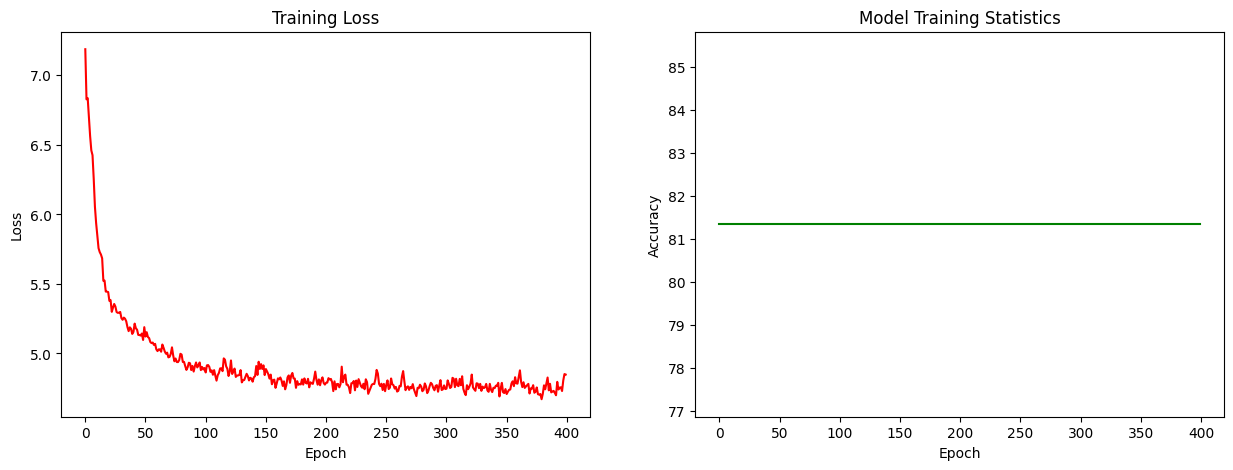

In [37]:
# plot the training loss and validation accuracy in seperate plots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(training_loss_list, color='red')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.plot(valid_acc_list, color='green')
ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.title('Model Training Statistics')
plt.show()

In [52]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[ 67,   0,   1,   1,   4,   0],
       [  1, 120,   3,   0,   1,   0],
       [  1,   1,  90,   0,   1,   0],
       [  0,   0,   4,  37,   0,   0],
       [  0,   4,   0,   0,  29,   0],
       [  1,   4,  21,   0,   1,  10]])

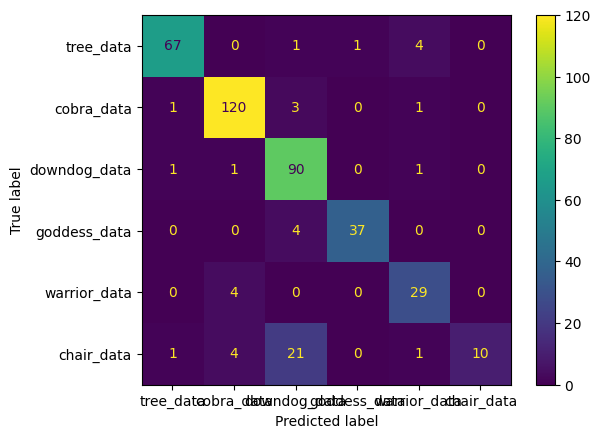

In [50]:
disp = ConfusionMatrixDisplay(confusion, display_labels = ['tree_data','cobra_data','downdog_data','goddess_data','warrior_data','chair_data'])
disp.plot()

In [48]:

target_names = ['tree_data','cobra_data','downdog_data','goddess_data','warrior_data','chair_data']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   tree_data       0.96      0.92      0.94        73
  cobra_data       0.93      0.96      0.94       125
downdog_data       0.76      0.97      0.85        93
goddess_data       0.97      0.90      0.94        41
warrior_data       0.81      0.88      0.84        33
  chair_data       1.00      0.27      0.43        37

    accuracy                           0.88       402
   macro avg       0.90      0.82      0.82       402
weighted avg       0.90      0.88      0.86       402

